In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import transforms
import os
from tqdm import tqdm

In [186]:
filename=os.listdir(r"D:\Datasets\Disasters\train\cyclone")
filename[0]

'0.jpg'

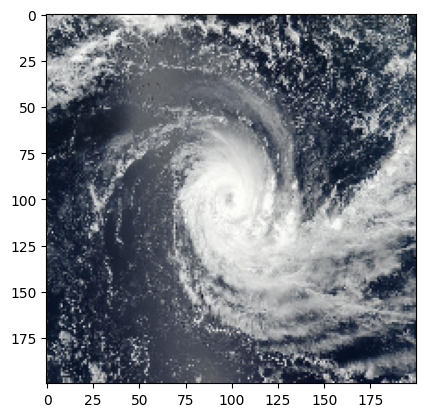

In [187]:
import cv2
image=cv2.imread(r"D:\Datasets\Disasters\train\cyclone\0.jpg")
image=cv2.resize(image,dsize=(200,200))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [188]:
from concurrent.futures import ThreadPoolExecutor,as_completed
import glob as glob
def process_image(filename):
    image=cv2.imread(filename)
    try:
        if image is not None:
            image=cv2.resize(image,dsize=(200,200))
            image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            return image
        else :
            print("No image present at this loaction")
            return None
    except cv2.error as e:
        print("cv2 error :",e)
        return None
    except Exception as e:
        print("Exception error :",e)
        return None
    
def load_images(paths):
    image_format=["*.jpg","*.h5"]
    filename=[]
    for ects in image_format:
        file_path=os.path.join(paths,ects)
        filename.extend(glob.glob(file_path))
    images=[]
        
    with ThreadPoolExecutor(max_workers=8) as executor:
        future_to_filename = {executor.submit(process_image, filename): filename for filename in filename[0: int(1*len(filename))]}
        for future in tqdm(as_completed(future_to_filename), total=len(filename)):
            result = future.result()
            if result is not None:
                images.append(result) 
        return np.array(images)
        
        

In [ ]:
cyclone_train=load_images(r"D:\Datasets\Disasters\train\cyclone")
earthquake_train=load_images(r"D:\Datasets\Disasters\train\earthquake")
flood_train=load_images(r"D:\Datasets\Disasters\train\flood")
wildfire_train=load_images(r"D:\Datasets\Disasters\train\wildfire")

 26%|██▌       | 103/400 [00:01<00:07, 42.38it/s]

In [ ]:
np.save("cyclone_train.npy",cyclone_train)
np.save("earthquake_train.npy",earthquake_train)
np.save("flood_train.npy",flood_train)
np.save("wildfire_train.npy",wildfire_train)

In [ ]:
cyclone_test=load_images(r"D:\Datasets\Disasters\test\cyclone")
earthquake_test=load_images(r"D:\Datasets\Disasters\test\earthquake")
flood_test=load_images(r"D:\Datasets\Disasters\test\flood")
wildfire_test=load_images(r"D:\Datasets\Disasters\test\wildfire")

100%|██████████| 100/100 [00:02<00:00, 42.35it/s]


In [ ]:
np.save("cyclone_test.npy",cyclone_test)
np.save("earthquake_test.npy",earthquake_test)
np.save("flood_test.npy",flood_test)
np.save("wildfire_test.npy",wildfire_test)

In [ ]:
cyclone_train.shape,cyclone_test.shape,len(cyclone_train),len(cyclone_test)

((400, 200, 200, 3), (100, 200, 200, 3), 400, 100)

In [ ]:
y_train=np.array([0]*len(cyclone_train)+[1]*len(earthquake_train)+[2]*len(flood_train)+[3]*len(wildfire_train))
y_test=np.array([0]*len(cyclone_test)+[1]*len(earthquake_test)+[2]*len(flood_test)+[3]*len(wildfire_test))
y_train.shape,y_test.shape

((1600,), (400,))

In [ ]:
y_train[1200]

3

In [ ]:
x1_train=np.append(cyclone_train,earthquake_train,axis=0)
x1_test=np.append(cyclone_test,earthquake_test,axis=0)
x1_train.shape

(800, 200, 200, 3)

In [ ]:
x2_train=np.append(flood_train,wildfire_train,axis=0)
x2_test=np.append(flood_test,wildfire_test,axis=0)

In [ ]:
x_train=np.append(x1_train,x2_train,axis=0)
x_test=np.append(x1_test,x2_test,axis=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 200, 200, 3), (400, 200, 200, 3), (1600,), (400,))

In [ ]:
cyclone_test[0]

array([[[ 35,  33,  36],
        [ 39,  37,  40],
        [ 51,  49,  52],
        ...,
        [209, 198, 204],
        [160, 153, 156],
        [129, 122, 125]],

       [[ 35,  33,  36],
        [ 40,  38,  41],
        [ 51,  49,  52],
        ...,
        [186, 175, 181],
        [176, 169, 172],
        [155, 149, 151]],

       [[ 33,  31,  34],
        [ 33,  31,  34],
        [ 51,  49,  52],
        ...,
        [182, 171, 177],
        [195, 191, 192],
        [216, 212, 213]],

       ...,

       [[ 55,  53,  58],
        [ 50,  48,  53],
        [ 53,  51,  54],
        ...,
        [168, 163, 169],
        [146, 143, 148],
        [238, 235, 240]],

       [[ 54,  52,  57],
        [ 53,  51,  56],
        [ 55,  53,  56],
        ...,
        [172, 170, 175],
        [150, 148, 154],
        [207, 205, 210]],

       [[ 53,  51,  56],
        [ 54,  52,  57],
        [ 54,  53,  55],
        ...,
        [168, 166, 171],
        [190, 189, 194],
        [207, 205, 210]]

In [ ]:
def show_image(image,label,start_index):
    counter=start_index
    fig,axs=plt.subplots(nrows=4,ncols=8,figsize=(10,6))
    for i in range(4):
        for j in range(8):
            axs[i][j].imshow(image[counter])
            axs[i][j].set_title(label[counter].item())
            axs[i][j].get_xaxis().set_visible(False)
            axs[i][j].get_yaxis().set_visible(False)
            counter+=1
    plt.show()

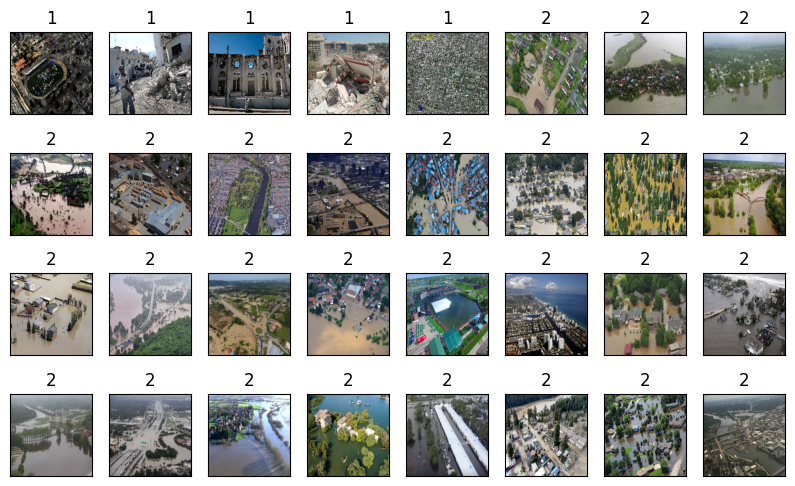

In [ ]:
show_image(x_train,y_train,795)

In [ ]:
train_transforms=transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomGrayscale(p=0.1),
        transforms.RandomRotation(20),
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]),
    ]
)

test_transforms=transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]),
    ]
)

In [ ]:
class Data(Dataset):
    def __init__(self,images,labels,transforms=None):
        super().__init__()
        self.images=images
        self.labels=labels
        self.transforms=transforms
        
    def __getitem__(self,index):
        image=self.images[index]
        label=self.labels[index]
        if self.transforms:
            image=self.transforms(image)
        return (image,label)
    
    def __len__(self):
        return len(self.images)

In [ ]:
for y in y_train:
    print(y)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
Data(x_train,y_train,train_transforms)[10]

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 0)

In [ ]:
# d1=Data(x_train,y_train,train_transforms)
# for id,(image,label) in enumerate(Data(x_train,y_train,train_transforms)):
#     print(id,image.shape,label.shape)

In [ ]:
train_dataset=Data(x_train,y_train,train_transforms)
test_dataset=Data(x_test,y_test,test_transforms)
len(train_dataset),len(test_dataset)

(1600, 400)

In [ ]:
train_dataloader=DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True,
)

test_dataloader=DataLoader(
    dataset=test_dataset,
    batch_size=32,
    drop_last=True,
)

In [ ]:
# for batch,(x,y) in enumerate(train_dataloader):
#     print(batch,(x.shape,y.shape))

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(
            in_channels=3,
            out_channels=32,
            stride=(1,1),
            padding=(1,1),
            kernel_size=(3,3),
        )
        self.bn1=nn.BatchNorm2d(num_features=32)
        self.maxpool=nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.conv2=nn.Conv2d(
            in_channels=32,
            out_channels=64,
            padding=1,
            stride=1,
            kernel_size=3,
        )
        self.bn2=nn.BatchNorm2d(num_features=64)
        
        self.conv3=nn.Conv2d(
            in_channels=64,
            out_channels=128,
            padding=1,
            stride=1,
            kernel_size=3,
        )
        self.bn3=nn.BatchNorm2d(num_features=128)
        
        self.conv4=nn.Conv2d(
            in_channels=128,
            out_channel=64,
            padding=1,
            stride=1,
            kernel_size=3,
        )
        self.bn4=nn.BatchNorm2d(num_features=64)
        
        self.fc1=nn.Linear(
            in_features=64*12*12,
            out_features=64,
        )
        
        self.fc2=nn.Linear(
            in_features=64,
            out_features=32,
        )
        
        self.fc3=nn.Linear(
            in_features=32,
            out_features=16,
        )
        
        self.fc4=nn.Linear(
            in_features=16,
            out_features=4
        )
        
    def forward(self,x):
        x=nn.functional.relu(self.bn1(self.conv1(x)))
        x=self.maxpool(x)
        
        x=nn.functional.relu(self.bn2(self.conv2(x)))
        x=self.maxpool(x)
        
        x=nn.functional.relu(self.bn3(self.conv3(x)))
        x=self.maxpool(x)
        
        x=nn.functional.relu(self.bn4(self.conv4(x)))
        x=self.maxpool(x)
        
        x=x.reshape(x.shape[0],-1)
        
        x=nn.functional.relu(self.fc1(x))
        
        x=nn.functional.relu(self.fc2(x))
        
        x=nn.functional.relu(self.fc3(x))
        
        x=nn.functional.softmax(self.fc4(x))
        
        return x

In [ ]:
model=CNN()
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=18432, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=Tru

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torchinfo
from torchinfo import summary
summary(model,input_size=(32,3,200,200))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [32, 4]                   --
├─Conv2d: 1-1                            [32, 32, 200, 200]        896
├─BatchNorm2d: 1-2                       [32, 32, 200, 200]        64
├─MaxPool2d: 1-3                         [32, 32, 100, 100]        --
├─Conv2d: 1-4                            [32, 64, 100, 100]        18,496
├─BatchNorm2d: 1-5                       [32, 64, 100, 100]        128
├─MaxPool2d: 1-6                         [32, 64, 50, 50]          --
├─Conv2d: 1-7                            [32, 128, 50, 50]         73,856
├─BatchNorm2d: 1-8                       [32, 128, 50, 50]         256
├─MaxPool2d: 1-9                         [32, 128, 25, 25]         --
├─Conv2d: 1-10                           [32, 128, 25, 25]         147,584
├─BatchNorm2d: 1-11                      [32, 128, 25, 25]         256
├─MaxPool2d: 1-12                        [32, 128, 12, 12]         -

In [ ]:
test=torch.randn(32,3,200,200)
pred=model(test)
pred_class=torch.argmax(pred,dim=1)
pred,pred_class

(tensor([[0.2190, 0.2004, 0.3098, 0.2708],
         [0.2269, 0.1975, 0.3143, 0.2613],
         [0.2204, 0.1993, 0.3132, 0.2670],
         [0.2251, 0.1961, 0.3184, 0.2604],
         [0.2270, 0.2012, 0.3098, 0.2619],
         [0.2236, 0.1996, 0.3093, 0.2675],
         [0.2252, 0.1981, 0.3112, 0.2656],
         [0.2233, 0.2013, 0.3108, 0.2646],
         [0.2192, 0.2052, 0.3126, 0.2630],
         [0.2229, 0.1976, 0.3149, 0.2646],
         [0.2236, 0.1957, 0.3160, 0.2647],
         [0.2255, 0.2042, 0.3075, 0.2628],
         [0.2249, 0.1959, 0.3147, 0.2645],
         [0.2243, 0.1973, 0.3153, 0.2631],
         [0.2243, 0.2060, 0.3052, 0.2645],
         [0.2254, 0.2010, 0.3134, 0.2602],
         [0.2235, 0.2016, 0.3066, 0.2683],
         [0.2262, 0.2046, 0.3069, 0.2623],
         [0.2244, 0.1980, 0.3140, 0.2636],
         [0.2225, 0.2021, 0.3148, 0.2606],
         [0.2211, 0.1984, 0.3105, 0.2700],
         [0.2230, 0.1993, 0.3106, 0.2672],
         [0.2227, 0.2007, 0.3100, 0.2665],
         [0

In [ ]:
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

In [ ]:
def predict():
    total,correct=0,0
    model.eval()
    with torch.no_grad():
        for batch,(x,y) in enumerate(test_dataloader):
            x=x.to(device)
            y=y.long().squeeze().to(device)
            pred=model(x)
            test_loss=loss_fn(pred,y)
            pred_class=torch.argmax(pred,dim=1)
            total+=len(y)
            correct+=torch.sum(pred_class==y)
        test_acc=correct/total
        return test_loss,test_acc

In [ ]:
device=torch.device("cpu")
model.to(device)
epoch=50
test_losses=[]
test_accs=[]
train_losses=[]
train_accs=[]
total,correct=0,0
for epochs in range(epoch):
    model.train()
    for batch,(x,y) in tqdm(enumerate(train_dataloader),total=len(train_dataloader)):
        x=x.to(device)
        y=y.long().squeeze().to(device)
        optimizer.zero_grad()
        pred=model(x)
        train_loss=loss_fn(pred,y)
        train_loss.backward()
        optimizer.step()
        pred_class=torch.argmax(pred,dim=1)
        correct+=torch.sum(pred_class==y)
        total+=len(y)
    train_acc=correct/total
    test_loss,test_acc=predict()
    train_accs.append(train_acc.item())
    train_losses.append(train_loss.item())
    test_accs.append(test_acc.item())
    test_losses.append(test_loss.item())
    
    
    print(
        f"Epoch: {epochs} \t|"
        f" Train loss: {np.round(train_loss.item(),4)} \t|"
        f" Test loss: {np.round(test_loss.item(),4)} \t|"
        f" Train acc: {np.round(train_acc.item(),4)} \t|"
        f" Test acc: {np.round(test_acc.item(),4)}"
    )

100%|██████████| 50/50 [02:19<00:00,  2.80s/it]


Epoch: 0 	| Train loss: 1.2518 	| Test loss: 0.9002 	| Train acc: 0.4519 	| Test acc: 0.5911


100%|██████████| 50/50 [02:31<00:00,  3.03s/it]


Epoch: 1 	| Train loss: 0.9342 	| Test loss: 0.8939 	| Train acc: 0.5519 	| Test acc: 0.6927


100%|██████████| 50/50 [02:09<00:00,  2.60s/it]


Epoch: 2 	| Train loss: 0.9752 	| Test loss: 0.8091 	| Train acc: 0.6156 	| Test acc: 0.5


100%|██████████| 50/50 [02:09<00:00,  2.59s/it]


Epoch: 3 	| Train loss: 0.9793 	| Test loss: 1.0121 	| Train acc: 0.6541 	| Test acc: 0.7344


100%|██████████| 50/50 [02:08<00:00,  2.57s/it]


Epoch: 4 	| Train loss: 0.9144 	| Test loss: 0.8631 	| Train acc: 0.6769 	| Test acc: 0.5781


 26%|██▌       | 13/50 [00:40<01:55,  3.12s/it]


KeyboardInterrupt: 

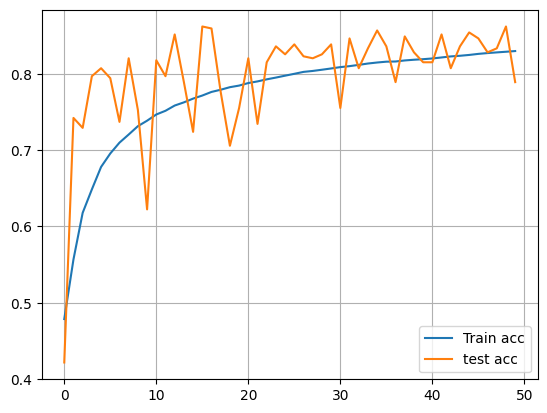

In [ ]:
plt.plot(train_accs,label="Train acc")
plt.plot(test_accs,label="test acc")
plt.grid()
plt.legend()
plt.show()

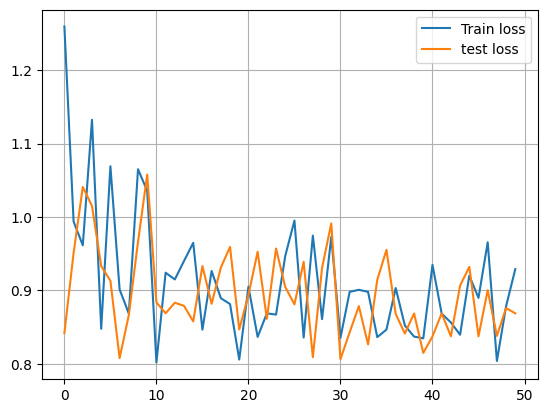

In [ ]:
plt.plot(train_losses,label="Train loss")
plt.plot(test_losses,label="test loss")
plt.grid()
plt.legend()
plt.show()